# Statistics Review

Here we review some basic statistics that will help us discuss fundamentals throughout the semester.

We will use `numpy` and `scipy` for this review. If Python and its basic libraries are unfamiliar, we will briefly review them in an upcoming lesson.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

## Random Variables

A random variable is a variable whose value depends on random events, i.e., events which have or appear to have an element of unpredictability. Random variables are usually represented by capital letters, e.g., $X, Y, Z$. We use random variables in data science when modeling processes that are truly unpredictable (e.g., a dice roll, or the value of a stock at some time in the future) and when modeling processes that may appear to be unpredictable but actually might be more predictable than they seem given enough properly transformed data (e.g., the next word in a sentence). Random variables can be discrete or continuous. Discrete random variables can only take on a countable set of values while continuous random variable can take on a continuously varying set of values.  We review both types here.

### Discrete Random Variables

An example of a discrete random variable is the outcome of rolling a die. There are 6 discrete possible outcomes. If the die is fair, then each outcome has the same probability. If the die is weighted, then some outcomes will have higher probability than others.

The set of probabilities which correspond to each of a discrete random variable's possible values is called that variable's *probability distribution* or *probability mass function*.

If we have the discrete probability distribution, we can visualize it as a bar chart. If we have samples from the discrete probability distribution, we can visualize them as a histogram. 

dict_keys([1, 2, 3, 4, 5, 6])


Text(0.5, 0, 'Possible Dice Rolls $x_i$')

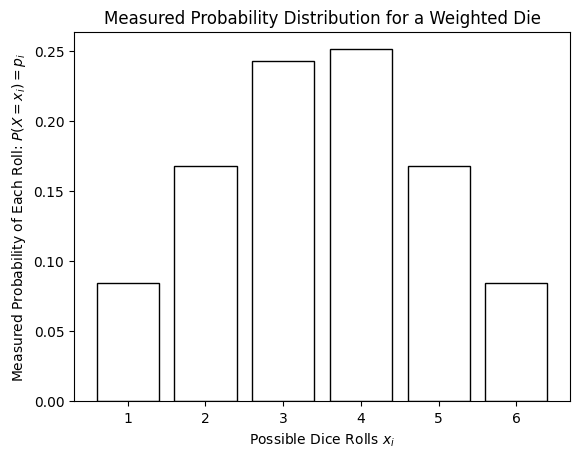

In [2]:
# Probability Distribution
weighted_die_probabilities: dict = {
    1: 1.0 / 12,
    2: 2.0 / 12,
    3: 3.0 / 12,
    4: 3.0 / 12,
    5: 2.0 / 12,
    6: 1.0 / 12,
}

print(weighted_die_probabilities.keys())


# Samples from the Probability Distribution
def compute_dice_rolls(n_rolls: int, probabilities: dict) -> np.ndarray:
    """Computes the outcomes of the number of rolls given."""
    outcomes = np.random.choice(
        list(probabilities.keys()), n_rolls, p=list(probabilities.values())
    )
    return outcomes


n_rolls = 10000
outcomes = compute_dice_rolls(n_rolls, weighted_die_probabilities)

# Histogram to Visualize Samples (Made with Bar Chart)

fig, ax = plt.subplots()
labels, counts = np.unique(outcomes, return_counts=True)
probabilities = counts / n_rolls
plt.bar(labels, probabilities, align="center", fill=False)
ax.set_xticks(labels)
ax.set_title("Measured Probability Distribution for a Weighted Die")
ax.set_ylabel("Measured Probability of Each Roll: $P(X = x_i) = p_i$")
ax.set_xlabel("Possible Dice Rolls $x_i$")


### Continuous Random Variables

An example of a continuous random variable is the height of a person randomly selected from a given population. Some heights (e.g., between 5-6 feet) will be more probable than others.

A continuous random variable is defined over an interval of values, rather than at specific values. When working with continuous random variables, we ask about the probability that the variable will take on a value within an interval, rather than the probability that it will take on a single discrete value.

A continuous random variable is characterized by a probability density function (PDF). A PDF $f(x)$ is non-negative

$$
f(x) > 0,
$$

has an area equal to 1

$$
\int_{\mathbb{R}}f(x) dx = 1,
$$

and when integrated from $x_0$ to $x_1$ yields the probability that the random variable falls inside the interval $I = [x_0, x_1]$, i.e.,

$$
P(x_0 < X < x_1) = \int_{x_0}^{x_1} f(x) dx = \int_I f(x) dx
$$

Note that when working on a computer, all variables are discrete, however, we have enough granularity in our discretization process to model continuous random variables in high fidelity. It is important when working with and visualizing discrete random variables to keep track of whether or not they have been chosen to approximately model a continuous process.

If we have the ideal PDF (e.g., as an equation) then we can plot it as a line. If we have samples of the random variable, then we can use a histogram. In practice, we very rarely know the true ideal PDF, and can only attempt to estimate it from samples of a random variable.

Using height as an example, we can consider the following two PDFs for the height of males and females in inches.

$$
\begin{align*}
h_M &= \mathcal{N}(\mu_M, \sigma_M^2), &\mu_M &= 69.7, &\sigma_M &= 2.8 \\
h_F &= \mathcal{N}(\mu_F, \sigma_F^2), &\mu_F &= 64.4, &\sigma_F &= 2.4 \\
\end{align*}
$$

Here, $\mathcal{N}(\mu, \sigma)$ denotes the normal distribution (i.e., the bell curve)

$$
\mathcal{N}(\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.
$$

Text(0.5, 0, 'Height (in)')

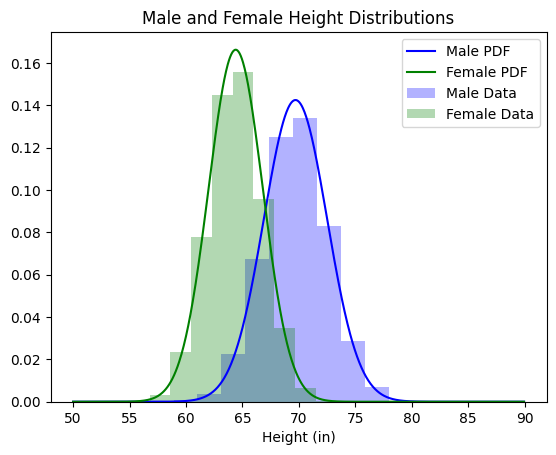

In [3]:
from scipy import stats

height_in = np.arange(50.0, 90.0, 0.05)

# Define the parameters of normal distributions
mu_male_in = 69.7
sigma_male_in = 2.8
mu_female_in = 64.4
sigma_female_in = 2.4

male_height_rv = stats.norm(loc=mu_male_in, scale=sigma_male_in)
female_height_rv = stats.norm(loc=mu_female_in, scale=sigma_female_in)

# Use norm.pdf() to generate a curve showing their ideal PDFs
ideal_pdf_male_height = male_height_rv.pdf(height_in)
ideal_pdf_female_height = female_height_rv.pdf(height_in)

# Sample the Random Variable
n_samples = 10000
male_height_samples = male_height_rv.rvs(n_samples)
female_height_samples = female_height_rv.rvs(n_samples)

# Show the Samples as a Histogram
fig, ax = plt.subplots()
ax.plot(height_in, ideal_pdf_male_height, c="b")
ax.plot(height_in, ideal_pdf_female_height, c="g")
ax.hist(male_height_samples, density=True, color="b", alpha=0.3)
ax.hist(female_height_samples, density=True, color="g", alpha=0.3)
ax.legend(("Male PDF", "Female PDF", "Male Data", "Female Data"))
ax.set_title("Male and Female Height Distributions")
ax.set_xlabel("Height (in)")

## Expected Value

The expected value $\mathrm{E}[X]$ is defined for a discrete random variable $X$ with countable outcomes $x_i$ having probability $p_i$

$$
\mathrm{E}[X] = \sum_i x_i p_i.
$$

Similarly, $\mathrm{E}[X]$ is defined for a continuous random variable $X$ with PDF $f(x)$

$$
\mathrm{E}[X] = \int_{-\infty}^{\infty} x f(x) dx .
$$

The expected value of a normal distribution is its mean, $\mu$.

Expected value is linear.

$$
\begin{align*}
\mathrm{E}[X + Y] &= \mathrm{E}[X] + \mathrm{E}[Y] \\
\mathrm{E}[aX] &= a\mathrm{E}[X]
\end{align*}
$$

In the algebra of random variables, it is common to invoke the Law of the Unconscious Statistician (LOTUS) to determine the expected value of a function of a random variable. The expected value of a function $g(X)$ of a random variable $X$ with PDF $f_X(x)$ is given by

$$
\begin{align*}
\mathrm{E}[g(X)] &= \sum_x g(x) p_X(x) \\
\mathrm{E}[g(X)] &= \int_{-\infty}^{\infty} g(x)f_X(x) dx
\end{align*}
$$

In [4]:
# Use the PDFs to compute the ideal expected value
ideal_expected_value_male_in = male_height_rv.expect()
ideal_expected_value_female_in = female_height_rv.expect()

print(ideal_expected_value_male_in)
print(ideal_expected_value_female_in)

# Use the data to compute the measured expected value
measured_expected_value_male_in = np.mean(male_height_samples)
measured_expected_value_female_in = np.mean(female_height_samples)

print(measured_expected_value_male_in)
print(measured_expected_value_female_in)

69.70000000000005
64.39999999999999
69.72372996708158
64.37971290434628


Text(0.5, 0, 'Height (in)')

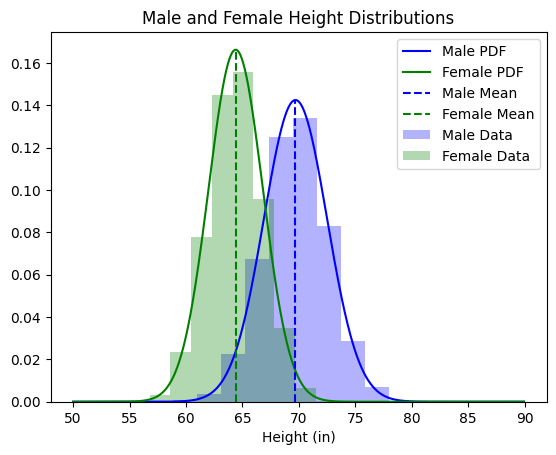

In [5]:
# Add the Ideal and Measured Expected Values to Our Histograms
fig, ax = plt.subplots()
ax.plot(height_in, ideal_pdf_male_height, c="b")
ax.plot(height_in, ideal_pdf_female_height, c="g")
ax.vlines(
    ideal_expected_value_male_in,
    0,
    max(ideal_pdf_male_height),
    colors="b",
    linestyles="--",
)
ax.vlines(
    ideal_expected_value_female_in,
    0,
    max(ideal_pdf_female_height),
    colors="g",
    linestyles="--",
)
ax.hist(male_height_samples, density=True, color="b", alpha=0.3)
ax.hist(female_height_samples, density=True, color="g", alpha=0.3)
ax.legend(
    (
        "Male PDF",
        "Female PDF",
        "Male Mean",
        "Female Mean",
        "Male Data",
        "Female Data",
    )
)
ax.set_title("Male and Female Height Distributions")
ax.set_xlabel("Height (in)")

## Variance

Variance is the expected value of the squared deviation from the mean of a random variable,

$$
\mathrm{Var}(X) = E[(X-\mu)^2].
$$

For a discrete and continuous random variable, variance is defined respectively as

$$
\begin{align*}
\mathrm{Var}(X) &= \sum_i p_i (x_i - \mu)^2, \\
\mathrm{Var}(X) &= \int_{-\infty}^{\infty} (x- \mu)^2 f(x) dx
\end{align*}
$$

Variance can be computed from expected value by

$$
\mathrm{Var}(X) = E[X^2] - E[X]^2
$$

but this equation should not be used when calculating variance in practice on a computer.

The variance of a normal distribution is the square of the standard deviation, $\sigma^2$.





Text(0.5, 0, 'Height (in)')

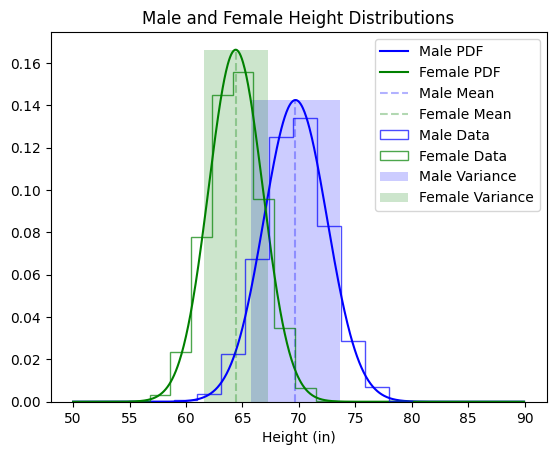

In [6]:
var_male_in = sigma_male_in**2
var_female_in = sigma_female_in**2

fig, ax = plt.subplots()

# Ideal distributions
ax.plot(height_in, ideal_pdf_male_height, c="b")
ax.plot(height_in, ideal_pdf_female_height, c="g")
ax.vlines(
    ideal_expected_value_male_in,
    0,
    max(ideal_pdf_male_height),
    colors="b",
    linestyles="--",
    alpha=0.3,
)
ax.vlines(
    ideal_expected_value_female_in,
    0,
    max(ideal_pdf_female_height),
    colors="g",
    linestyles="--",
    alpha=0.3,
)

# Data Histograms
ax.hist(
    male_height_samples, density=True, color="b", alpha=0.7, histtype="step"
)
ax.hist(
    female_height_samples, density=True, color="g", alpha=0.7, histtype="step"
)

# Variance Fill
sigma_male_mask = (height_in > mu_male_in - var_male_in / 2) & (
    height_in < mu_male_in + var_male_in / 2
)
sigma_female_mask = (height_in > mu_female_in - var_female_in / 2) & (
    height_in < mu_female_in + var_female_in / 2
)
ax.fill_between(
    height_in,
    np.max(ideal_pdf_male_height),
    where=sigma_male_mask,
    facecolor="b",
    alpha=0.2,
)
ax.fill_between(
    height_in,
    np.max(ideal_pdf_female_height),
    where=sigma_female_mask,
    facecolor="g",
    alpha=0.2,
)

# Legend
ax.legend(
    (
        "Male PDF",
        "Female PDF",
        "Male Mean",
        "Female Mean",
        "Male Data",
        "Female Data",
        "Male Variance",
        "Female Variance",
    )
)

ax.set_title("Male and Female Height Distributions")
ax.set_xlabel("Height (in)")

## Covariance

A joint probability distribution is one that is defined on all possible pairs of outcomes of two individual random variables. The distributions of the random variables are called the marginals (since they would be in the margins of a probability table).

For a joint probability distribution consisting of random variables $X$ and $Y$ the covariance is defined as the expected value of the product of the differences between each sample and the expected value of the respective variable, i.e.,

$$
\mathrm{cov}(X, Y) = \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])].
$$

Similar to variance, covariance can also be computed with 

$$
\mathrm{cov}(X, Y) = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y]
$$

but this should be avoided in practice since the formula is not numerically stable.

The following visualizations should provide insight into what covariance is measuring. We generate these visualizations by combining code from MatPlotLib's [scatter plot with histograms](https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py) and confidence ellipse examples.


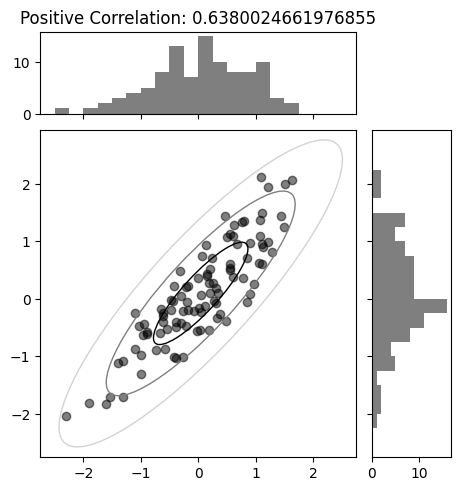

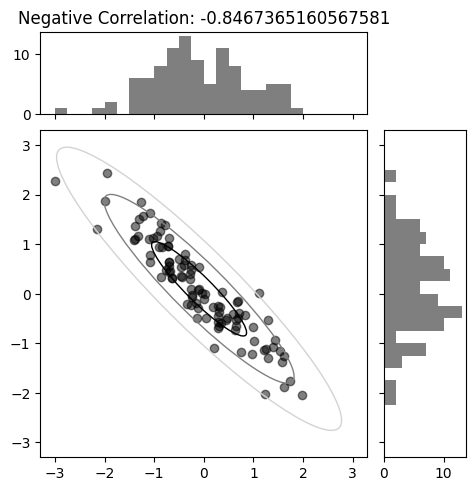

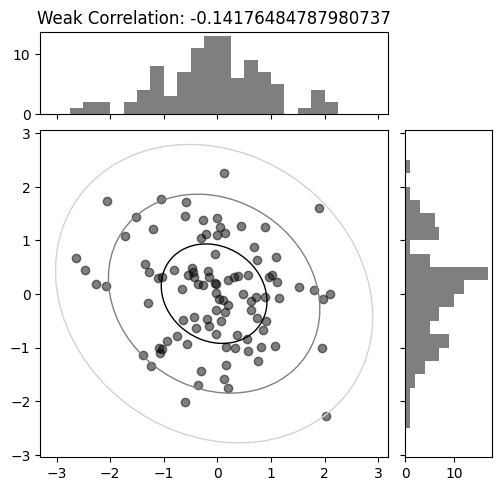

In [7]:
from joint_distribution_plotter import plot_joint_distribution


# Helper function to get a correlated dataset
def get_correlated_dataset(n, dependency_matrix, mu_offsets, scale_factors):
    latent_variables = np.random.randn(n, 2)
    dependent = latent_variables.dot(dependency_matrix)
    scaled = dependent * scale_factors
    scaled_with_offset = scaled + mu_offsets
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]


# Specifies how much of each latent random variable contributes to the
# dependent random variables.
#
# D = [[1,1],[0,0]] --> both dependent variables equal first latent variable
# D = [[0,0],[1,1]] --> both dependent variables equal second latent variable
dependency_matrices = {
    "Positive Correlation": [[1, 1], [0.2, -0.2]],
    "Negative Correlation": [[1, -1], [0.2, 0.2]],
    "Weak Correlation": [[1, 0], [0, 1]],
}

# Specifies offsets and scale factors for each random variable
mu_offsets = 0, 0
scale_factors = 1, 1
number_of_points = 100

for title, dependency in dependency_matrices.items():
    x, y = get_correlated_dataset(
        number_of_points, dependency, mu_offsets, scale_factors
    )
    cov_matrix = np.cov(x, y)
    title = title + f": {cov_matrix[0,1]}"
    plot_joint_distribution(x, y, title)